In [2297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2298]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2299]:
columns = ['HR', 'thickness','wetting','wall','liquid']

In [2300]:
raw_dataset = pd.read_csv('/content/drive/MyDrive/Rice Google Drive/Research/Misc/nasim_ML.csv', sep = ',')

In [2301]:
raw_dataset.columns

Index(['HR', 'thickness', 'wetting', 'wall', 'liquid', 'time (ns)',
       'Unnamed: 6'],
      dtype='object')

In [2302]:
raw_dataset.drop(['time (ns)','Unnamed: 6'],axis=1,inplace=True)

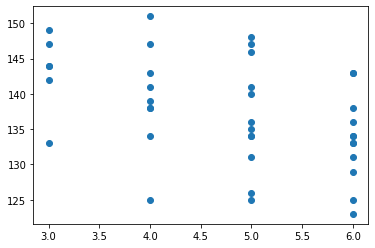

In [2303]:
plt.scatter(raw_dataset['thickness'], raw_dataset['liquid'])

**Data Wrangling**

In [2304]:
raw_dataset.isnull().sum()

HR           0
thickness    0
wetting      0
wall         9
liquid       9
dtype: int64

In [2305]:
raw_dataset.dropna(inplace=True)

In [2306]:
raw_dataset.isnull().sum()

HR           0
thickness    0
wetting      0
wall         0
liquid       0
dtype: int64

**Correlation**

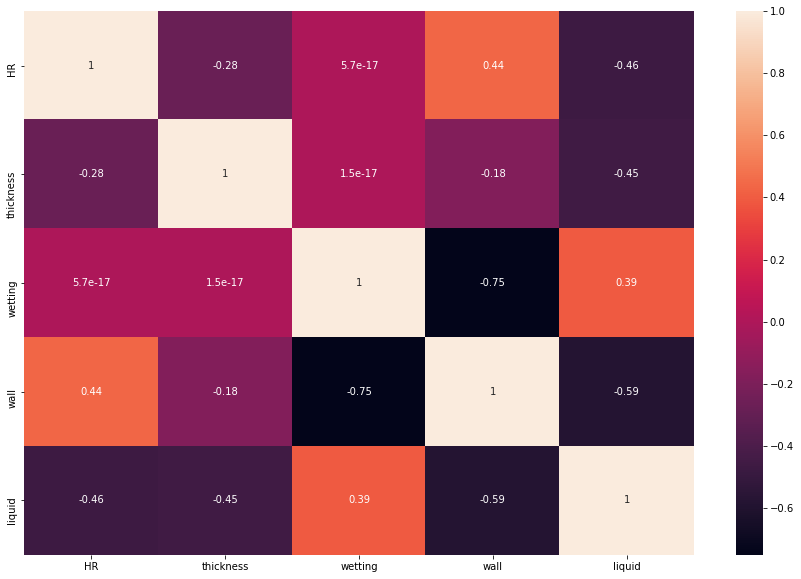

In [2307]:
plt.figure(figsize=(15,10))
sns.heatmap(raw_dataset.corr(), annot = True)

**Split Data into X & Y**

In [2308]:
notoutput = "wall"
output = "liquid"

In [2309]:
X = raw_dataset.drop([output, notoutput], axis = 1)
Y = raw_dataset[output]

In [2310]:
X

,HR,thickness,wetting
0,320,3,0.5
1,320,4,0.5
2,320,5,0.5
3,320,6,0.5
4,160,3,0.5
5,160,4,0.5
6,160,5,0.5
7,160,6,0.5
9,80,4,0.5
10,80,5,0.5


In [2311]:
Y

0     133.0
1     125.0
2     125.0
3     123.0
4     142.0
5     134.0
6     126.0
7     125.0
9     143.0
10    136.0
11    133.0
14    146.0
15    138.0
16    144.0
17    138.0
18    131.0
19    129.0
20    147.0
21    139.0
22    135.0
23    133.0
25    147.0
26    140.0
27    134.0
30    147.0
31    143.0
32    149.0
33    141.0
34    134.0
35    131.0
36    144.0
37    138.0
38    134.0
39    134.0
41    151.0
42    141.0
43    136.0
46    148.0
47    143.0
Name: liquid, dtype: float64

**Pre-Processing of Dataset**

In [2312]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [2313]:
# Applying Transformation
scaler_X = scaler.transform(X)

In [2314]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(scaler_X, Y, test_size = 0.1, random_state = 10)

In [2315]:
len(X_train)

35

**ANN Regression**

In [2316]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

In [2317]:
def build_model():
  model = Sequential()
  # Input Layer
  # units = num. of neurons, input shape = shape of features
  lambdaa = 1e-3
  model.add(Dense(units = 16, activation='relu',input_shape = [len(X.keys())],kernel_regularizer=regularizers.l2(lambdaa)))

  # Hidden Layer - I
  model.add(Dense(units = 32, activation='relu',kernel_regularizer=regularizers.l2(lambdaa)))

  # Hidden Layer - II
  model.add(Dense(units = 32, activation='relu',kernel_regularizer=regularizers.l2(lambdaa)))

  # Output Layer
  # Activation Function - Linear
  model.add(Dense(units = 1))

  # Optimizers
  # Learning rate = 'alpha'
  optimizers = Adam(learning_rate= 0.001)

  model.compile(loss = 'mean_absolute_percentage_error', optimizer = optimizers)
  return model

In [2318]:
model = build_model()

In [2319]:
model.summary()

Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_275 (Dense)            (None, 16)                64        
_________________________________________________________________
dense_276 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_277 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_278 (Dense)            (None, 1)                 33        
Total params: 1,697
Trainable params: 1,697
Non-trainable params: 0
_________________________________________________________________


In [2320]:
# Epochs = Number of Iterations, Batch Size = number of samples per execution
# validation_split = 15% of overall training samples to validate algorithm parallely to avoid overfitting of algorithm
callback = EarlyStopping(monitor='val_loss', patience=1000)
history = model.fit(X_train, Y_train, epochs = 4000, validation_split = 0.2, callbacks=callback)


Epoch 1/4000
1/1 [==============================] - 1s 1s/step - loss: 100.0804 - val_loss: 100.0649
Epoch 2/4000
1/1 [==============================] - 0s 22ms/step - loss: 100.0682 - val_loss: 100.0503
Epoch 3/4000
1/1 [==============================] - 0s 24ms/step - loss: 100.0564 - val_loss: 100.0360
Epoch 4/4000
1/1 [==============================] - 0s 20ms/step - loss: 100.0449 - val_loss: 100.0224
Epoch 5/4000
1/1 [==============================] - 0s 20ms/step - loss: 100.0336 - val_loss: 100.0090
Epoch 6/4000
1/1 [==============================] - 0s 23ms/step - loss: 100.0226 - val_loss: 99.9961
Epoch 7/4000
1/1 [==============================] - 0s 21ms/step - loss: 100.0118 - val_loss: 99.9839
Epoch 8/4000
1/1 [==============================] - 0s 39ms/step - loss: 100.0015 - val_loss: 99.9725
Epoch 9/4000
1/1 [==============================] - 0s 30ms/step - loss: 99.9912 - val_loss: 99.9611
Epoch 10/4000
1/1 [==============================] - 0s 25ms/step - loss: 99.981

(0.0, 105.01760728955269)

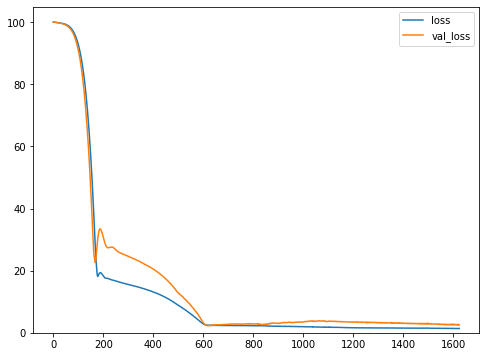

In [2321]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize = (8,6))
# plt.ylim(top=100)
plt.ylim(bottom=0)

In [2322]:
predictions = model.predict(X_test)

In [2323]:
from sklearn.metrics import r2_score
r2_score(Y_test, predictions)

0.975071075968278

In [2324]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,predictions)

2.1812808527756715

In [2325]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test,predictions)

1.286855697631836

In [2326]:
# model.weights
predicted_data = model.predict(scaler_X)
r2_score(Y, predicted_data)

0.8713952546251336

In [2327]:
mean_absolute_error(Y,predicted_data)

1.9598549084785657

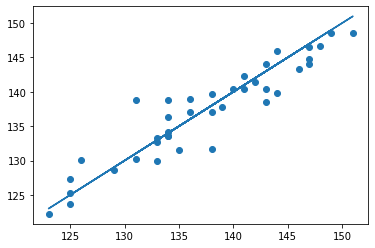

In [2328]:
plt.scatter(Y, predicted_data)
plt.plot(Y,Y)

In [2329]:
# model.save('/content/drive/MyDrive/Rice Google Drive/Research/Misc/wall_ML_neural')